In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

X_train= X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

#after reshaping
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 784) (60000, 1) (10000, 784) (10000, 1)


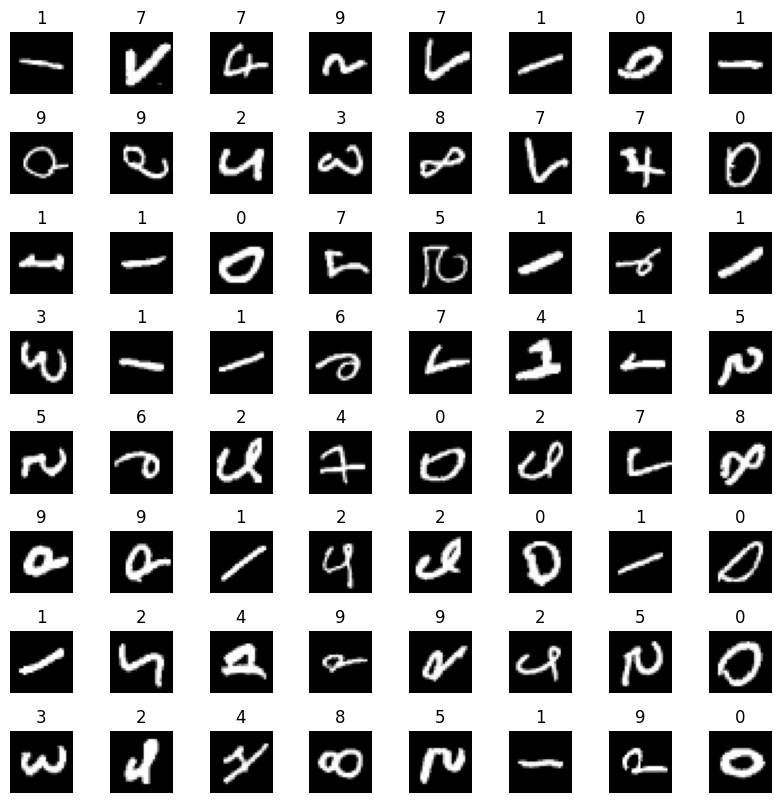

In [3]:
#Let's plot few images 

import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index,0])
    ax.set_axis_off()

In [4]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell
def plot_image(random_index):
    m, n = X_train.shape
    plt.figure(figsize=(3,3))
    X_random_reshaped = X_train[random_index].reshape((28,28)).T

    # Display the image
    plt.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    plt.title(y_train[random_index,0])
    plt.axis('off')




In [5]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),    #specify input size
        ### START CODE HERE ### 
        Dense(50,activation='relu', kernel_regularizer=regularizers.l2(0.01),name="L1"),
        Dense(25,activation='relu', kernel_regularizer=regularizers.l2(0.01),name="L2"),
        Dense(15,activation='relu', kernel_regularizer=regularizers.l2(0.01),name="L3"),
        Dense(10,activation='linear',name="L4")
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)       


# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),'accuracy']
)
history = model.fit(
    X_train,y_train,
    epochs=60,callbacks=[es],validation_split=0.3
)





Epoch 1/60
1313/1313 [==============================] - 5s 3ms/step - loss: 2.6870 - categorical_accuracy: 0.1457 - accuracy: 0.6067 - val_loss: 1.2955 - val_categorical_accuracy: 0.1117 - val_accuracy: 0.8554
Epoch 2/60
1313/1313 [==============================] - 3s 3ms/step - loss: 1.0312 - categorical_accuracy: 0.1049 - accuracy: 0.8853 - val_loss: 0.8399 - val_categorical_accuracy: 0.0882 - val_accuracy: 0.9062
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6494 - categorical_accuracy: 0.1006 - accuracy: 0.9223 - val_loss: 0.5640 - val_categorical_accuracy: 0.1081 - val_accuracy: 0.9209
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4650 - categorical_accuracy: 0.1006 - accuracy: 0.9349 - val_loss: 0.4125 - val_categorical_accuracy: 0.0947 - val_accuracy: 0.9398
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3665 - categorical_accuracy: 0.0999 - accuracy: 0.9443 - val_loss: 0.3664 - val_ca

In [6]:
L1_num_params = 784 * 50 + 50  # W1 parameters  + b1 parameters
L2_num_params = 784 * 25 + 25  # W1 parameters  + b1 parameters
L3_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L4_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params,",  L4 params = ", L4_num_params )

L1 params =  39250 , L2 params =  19625 ,  L3 params =  390 ,  L4 params =  16


In [7]:
[layer1, layer2, layer3, layer4] = model.layers

#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 50), b1 shape = (50,)
W2 shape = (50, 25), b2 shape = (25,)
W3 shape = (25, 15), b3 shape = (15,)


In [8]:
model_pred = model.predict(X_test)
yhat = np.argmax(model_pred,axis=1).reshape(10000,1)

313/313 [==============================] - 1s 2ms/step


In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support as score

def return_metrics(y_test, yhat):
    cm = confusion_matrix(y_test, yhat)
    cm_df = pd.DataFrame(cm,
                        index = ['0','1','2','3','4','5','6','7','8','9'], 
                        columns = ['0','1','2','3','4','5','6','7','8','9'])
    '''
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    '''
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    #print("recall - ", recall)
    #print("precision - ", precision)
    #Now the normalize the diagonal entries
    cm_accuracy = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    accuracy = cm_accuracy.diagonal()
    #print("Accuracy ",accuracy )

    report = classification_report(y_test,yhat, output_dict=True)

    df = pd.DataFrame(report).transpose()

    precision, recall, fscore, support = score(y_test, yhat)
    precision, recall, fscore, support = score(y_test, yhat)
    #over all precision recall accuracy
    '''
    print("Overall Precision",np.mean(precision))
    print("Overall Recall ",np.mean(recall))
    print("Overall fscore ", np.mean(fscore))
    print("Overall accuracy ", np.mean(accuracy))
    '''
    return cm_df, df,plt, precision, recall, accuracy, np.mean(precision), np.mean(recall),np.mean(fscore),np.mean(accuracy)


def plot_training_curve(history):
    #Training loss
    history.history['loss']
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Model Loss')
    plt.legend(loc='upper right')

Confusion Matrix
     0     1    2    3    4    5    6    7    8    9
0  960     0    4    0    0    9    4    1    2    0
1    0  1111    1    5    0    2    5    1   10    0
2    7     1  985   15    2    0    5    9    7    1
3    1     1    8  948    0   42    0    5    5    0
4    1     0    3    0  951    2    7    1    2   15
5    5     0    0   17    0  857    7    1    3    2
6    2     3    0    0   12   15  922    0    4    0
7    2    11   20    3    2    2    0  984    2    2
8    4     1    6   12    5   13   10    5  918    0
9    6     4    2   22   27   10    0   22   15  901
Overall Precision 0.9533420181205203
Overall Recall  0.9535800410724754
Overall fscore  0.9531546614706834
Overall accuracy  0.9535800410724754


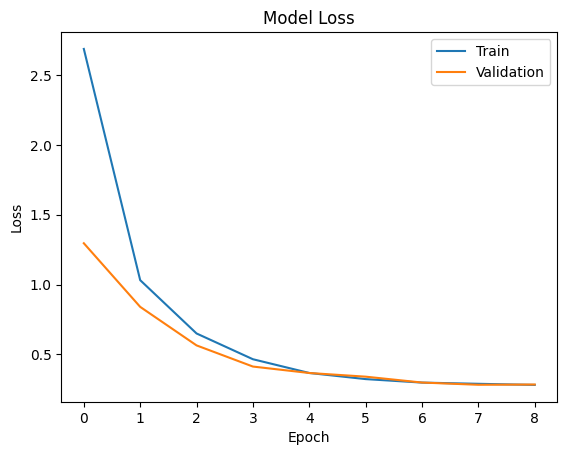

In [10]:
cm_df, df,plt, precision, recall, accuracy, overall_precision, overall_recall, overall_fscore, overall_accuracy = return_metrics(y_test,yhat)

# confusion matrix, overall_precision, overall_accuracy
print("Confusion Matrix")
print(cm_df)
print("Overall Precision",overall_precision)
print("Overall Recall ",overall_recall)
print("Overall fscore ",overall_fscore)
print("Overall accuracy ", overall_accuracy)
plot_training_curve(history)

<Axes: >

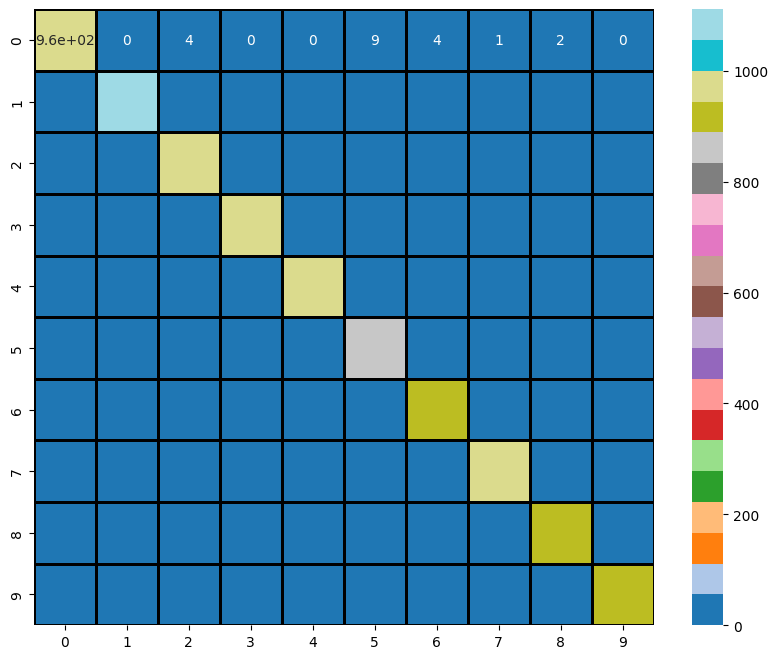

In [11]:
plt.figure(figsize=(10,8)) # visualising the confusion matrix in heatmap
sns.heatmap(cm_df,annot=True, cmap= 'tab20',linewidths=1, linecolor= 'black')

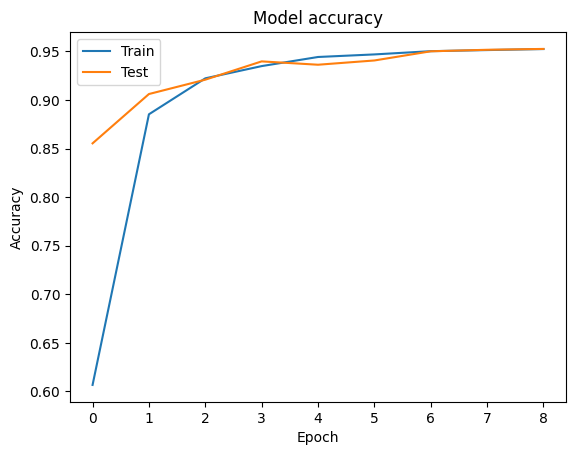

In [12]:
# Plot train vs test accuracy per epoch
plt.figure()
# Using the history metrics from keras callback
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

1/1 [==============================] - 0s 40ms/step


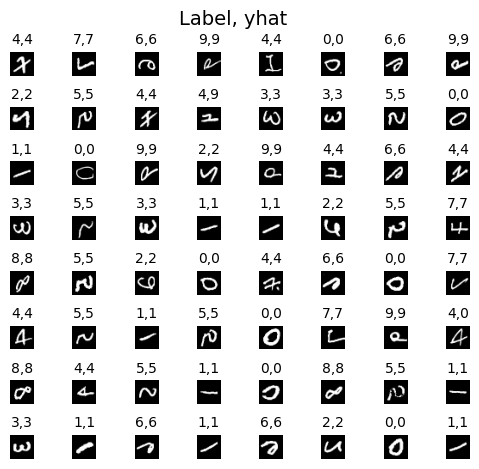

In [13]:
#predicting few examples
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
#widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_train[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

#Explanation 


Confusion Matrix
The confusion matrix provides a more detailed breakdown of a classifier's performance. Each row corresponds to the actual class, and each column corresponds to the predicted class.

Diagonal Elements: The diagonal elements (e.g., 964 for class 0, 1116 for class 1, etc.) show the number of correct classifications for each class.
Off-diagonal Elements: The off-diagonal elements show the misclassifications. For example, the number 7 at index (2, 0) indicates that 8 instances of class 2 were incorrectly classified as class 0.
Overall Metrics
Precision: Precision is the ratio of true positive predictions to the total predicted positives. The overall precision here is about 0.951, which is quite good.

Recall: Recall is the ratio of true positive predictions to the total actual positives. The overall recall is approximately 0.949, which is also good.

F-Score: The F-score is the harmonic mean of precision and recall and is a better metric than accuracy when the class distribution is imbalanced. The F-score here is about 0.949, indicating a good balance between precision and recall.

Accuracy: This is the ratio of the correctly labeled instances to the total instances. The overall accuracy is approximately 0.949, indicating that about 94.9% of the predictions were correct.

Interpretation
The model seems to perform very well, with high scores for precision, recall, and F-score.
The model seems to have difficulty distinguishing between classes that have a higher number of misclassifications, such as classes 3 and 9.
